## Logistic regression

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy 

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

#import seaborn as sns
#sns.set_context('notebook')
#sns.set_style('white')

As usual first let's load and plot data

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Wymiary danych treningowych: ',data.shape)
    print(data[1:6,:])
    return(data)

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='g', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='r', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [4]:
data = loaddata('data/RegLogExam.txt', ',')

Wymiary danych treningowych:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


In [5]:
y = np.c_[data[:,2]]
m = y.size
X = np.c_[np.ones((m,1)), data[:,0:2]]

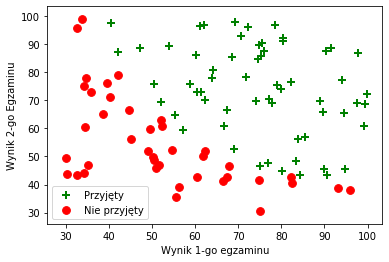

In [6]:
plotData(data, 'Wynik 1-go egzaminu', 'Wynik 2-go Egzaminu', 'Przyjęty', 'Nie przyjęty')

Hypothesis in logistic regression is equal to:
$$ h_{\theta}(x) = g(\theta^{T}x)$$
where g function is sigmoid:
$$g(z) = \frac{1}{1 + \exp^{-z}}$$
So hypothesis takes values form (0, 1), that's becouse it is a propability of success (that's means example is equla to class).
First step is implementation of sigmoid function.

In [7]:
def sigmoid(z):
    s = 0
    s = 1/(1+(np.e**(-z)))
    return s

For 0.235 sigmoid function will return value that's is close to 0.5584

In [8]:
sig = sigmoid(0.235)
sig

0.5584811124381613

Loss function:
#### $$ J(\theta) = \frac{1}{m}\sum_{i=0}^{m-1}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$

Opimizer:

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=0}^{m-1} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 

In [9]:
def costFunction(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(np.dot(X,theta))
    
    J1 = np.dot(np.transpose(y),np.log(h))
    J2 = np.dot(np.transpose(1-y),np.log(1-h))
    J = ((J1 + J2)*(-1))/m
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [10]:
def gradient(theta, X, y):
    m = y.size
    theta_t = copy.deepcopy(theta.reshape(-1, 1))

    h = sigmoid(np.dot(X,theta_t))
    
            
    grad =(np.dot(np.transpose(X),(h-y)))/m 

    return(grad.ravel())

In [11]:
initial_theta = np.zeros((X.shape[1], 1))
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost, type(cost))
print('Grad: \n', grad, type(grad), grad.shape)


Cost: 
 [0.69314718] <class 'numpy.ndarray'>
Grad: 
 [ -0.1        -12.00921659 -11.26284221] <class 'numpy.ndarray'> (3,)


Now it's time to optimize function parameters. 

In [12]:
res = minimize(costFunction, initial_theta, args=(X,y), method='CG', jac=gradient, options={'maxiter':400})
res

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


     fun: 0.20349770181913093
     jac: array([-3.70633347e-07, -1.03900858e-06,  8.98510700e-07])
 message: 'Optimization terminated successfully.'
    nfev: 173
     nit: 66
    njev: 162
  status: 0
 success: True
       x: array([-25.16257633,   0.20624163,   0.20148168])

In [13]:
theta_predict = res.x.reshape(3,1)
print(theta_predict)


[[-25.16257633]
 [  0.20624163]
 [  0.20148168]]


At the end we have to check accuracy of model.

In [14]:
def predict(theta, X):
    p = 0
    results = sigmoid(np.dot(X,theta))
    p = np.zeros(len(results))
    for i in range(len(results)):
        if results[i] >= 0.5:
            p[i] = 1
    return(p)

In [15]:
p = predict(theta_predict, X) 
dokladnosc = 0 
for i in range(len(p)):
    if p[i] == y[i]:
        dokladnosc += 1
dokladnosc /= m
dokladnosc *= 100
print('Dokladnosc {}%'.format(dokladnosc))

Dokladnosc 89.0%


One of students recived score 45 points from first exam and 85 from the second. What is the propability that this student will get accepted in college?

In [17]:
pp = 0
Xnew = np.array([1,45,85])
pp = sigmoid(np.dot(Xnew,theta_predict))
print(("Student ma %2.2f%% szans na to, że dostanie się na studia")%(pp*100))
print(theta_predict)

Student ma 77.63% szans na to, że dostanie się na studia
[[-25.16257633]
 [  0.20624163]
 [  0.20148168]]


Now let's take a look at decision boundary

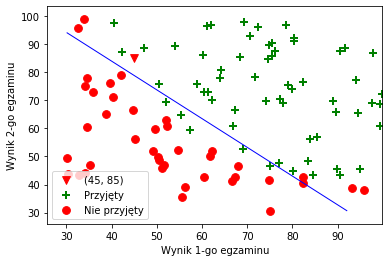

In [18]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Wynik 1-go egzaminu', 'Wynik 2-go egzaminu', 'Przyjęty', 'Nie przyjęty')

x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()

meshx, meshy = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
size = meshx.ravel().shape[0]
XX = np.c_[np.ones((size,1)), meshx.ravel(), meshy.ravel()]
h = sigmoid(XX.dot(theta_predict))

h = h.reshape(meshx.shape)
plt.contour(meshx, meshy, h, [0.5], linewidths=1, colors='b');


## Regularization

In [19]:
data2 = loaddata('data/RegLogChip.txt', ',')

Wymiary danych treningowych:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [20]:
y = np.c_[data2[:,2]]
X = data2[:,0:2]

Let's plot new dataset

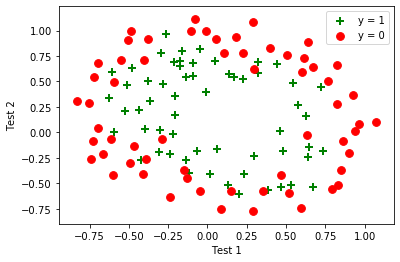

In [21]:
plotData(data2, 'Test 1', 'Test 2', 'y = 1', 'y = 0')

As we can see this decision boundary will be more complicated than piervous. To deal with that we will use a process that's named features mapping to make more data lie this:
$$\begin{bmatrix}1~~x_{1}~~x_{2}~~x_{1}^2~~x_{1}x_{2}~~x_{2}^2~~x_{1}^3~~ ...~~x_{1}x_{2}^5~~x_{2}^6 \end{bmatrix}$$


In [22]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
XX.shape

(118, 28)

Loss function with regularization
#### $$ J(\theta) = \frac{1}{m}\sum_{i=0}^{m-1}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n-1}\theta_{j}^{2}$$

and Optimizer
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=0}^{m-1} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ where j = 1, ..., n-1


In [23]:
def costFunctionReg(theta, reg, *args):#OK
    m = y.size
    
    #Tu wpisz kod
    h = sigmoid(np.dot(XX,theta))
    La = theta
    La[0] = 0
    J1 = np.dot(np.transpose(y),np.log(h))
    J2 = np.dot(np.transpose(1-y),np.log(1-h))
    J = ((J1 + J2)*(-1))/m + (reg/(2*m)) * La
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [37]:
def gradientReg(theta, reg, *args):
    m = y.size
    
    #Tu wpisz kod
    h = sigmoid(np.dot(XX,theta))
    La = theta
    La[0] = 0
    grad =(np.dot(np.transpose(XX),(h-y)))/m
    grad += (reg/m)*La
    
    return(grad.ravel())

In [38]:
reg = 3
initial_theta = np.zeros((XX.shape[1], 1))
print(initial_theta.shape)
cost = costFunctionReg(initial_theta,reg, XX, y)
print(cost)

grad = gradientReg(initial_theta, reg, XX, y)
print(grad.shape)

print(grad)

(28, 1)
[0.69314718]
(118, 28)
(28,)
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]
